In [13]:
import os
import sys

sys.path.append(os.path.abspath("../common"))  # add path to common functions
from evaluate import evaluate_predictions
from preprocess import getdfs
from preprocess import one_hot_encode
from models import predict_logistic_regression
from models import grid_search_
from models import predict_xgboost

In [14]:
train_df, test_df = getdfs("emoticon")
y_train = train_df["label"]
y_test = test_df["label"]

In [15]:
# Create one-hot encoding of the dataset

oh_X_train, oh_X_val, y_train, y_val = one_hot_encode(train_df, test_df)

==========Logistic Regression on One hot==========
              precision    recall  f1-score   support

     Class 0       0.91      0.88      0.89       252
     Class 1       0.88      0.90      0.89       237

    accuracy                           0.89       489
   macro avg       0.89      0.89      0.89       489
weighted avg       0.89      0.89      0.89       489

Accuracy is 0.8916155419222904
==========Logistic Regression on One hot==========


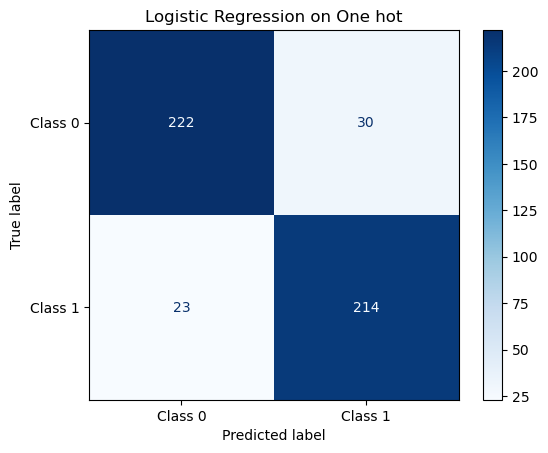

In [16]:
oh_y_pred = predict_logistic_regression(oh_X_train, y_train, oh_X_val)

evaluate_predictions(y_val, oh_y_pred, "Logistic Regression on One hot")

hyperparameter tuning

In [17]:
from sklearn.linear_model import LogisticRegression
param_grid = {
    "C": [0.01, 10, 100],  # Regularization strengths
    "penalty": ["l1", "l2"],  # Regularization type
    "solver": ["liblinear", "saga"],  # Solvers available for logistic regression
}
grid_search_(LogisticRegression(max_iter=1000), oh_X_train, y_train, param_grid)

KeyboardInterrupt: 

==========Logistic Regression on One hot 20%==========
              precision    recall  f1-score   support

     Class 0       0.76      0.79      0.77       252
     Class 1       0.76      0.74      0.75       237

    accuracy                           0.76       489
   macro avg       0.76      0.76      0.76       489
weighted avg       0.76      0.76      0.76       489

Accuracy is 0.7627811860940695
==========Logistic Regression on One hot 20%==========
==========Logistic Regression on One hot 40%==========
              precision    recall  f1-score   support

     Class 0       0.81      0.81      0.81       252
     Class 1       0.80      0.80      0.80       237

    accuracy                           0.81       489
   macro avg       0.81      0.81      0.81       489
weighted avg       0.81      0.81      0.81       489

Accuracy is 0.8057259713701431
==========Logistic Regression on One hot 40%==========
==========Logistic Regression on One hot 60%==========
         

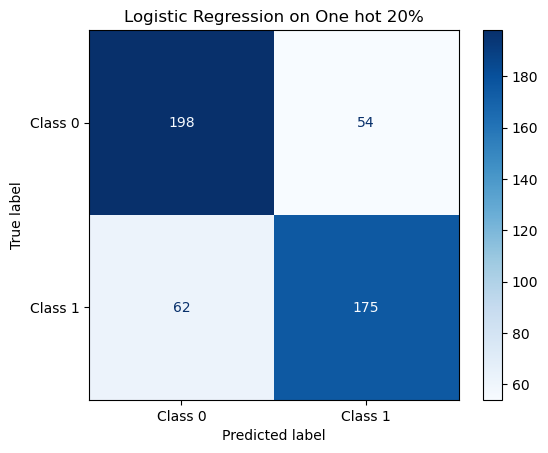

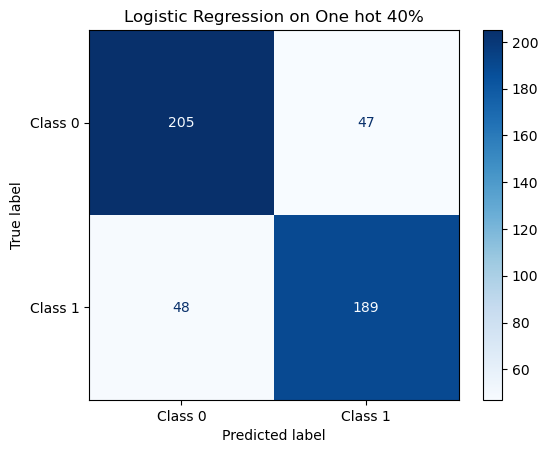

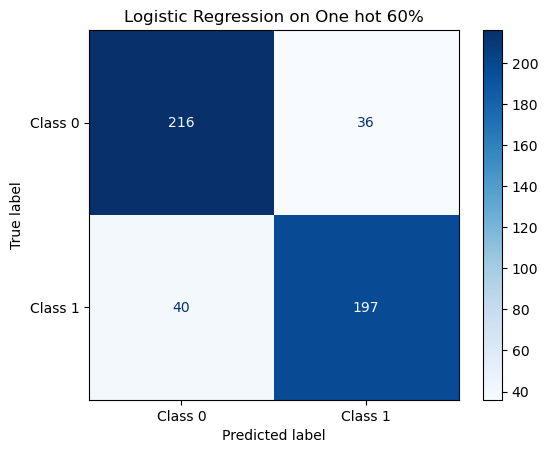

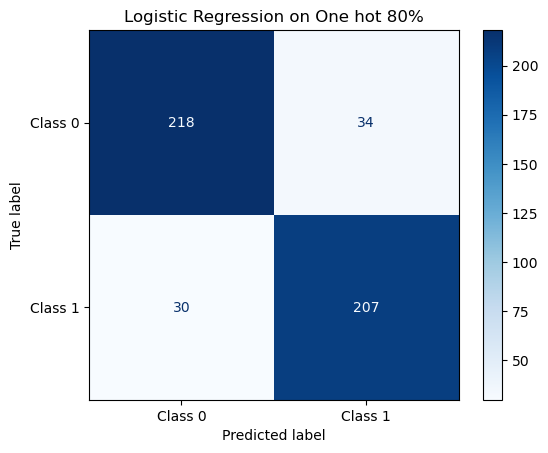

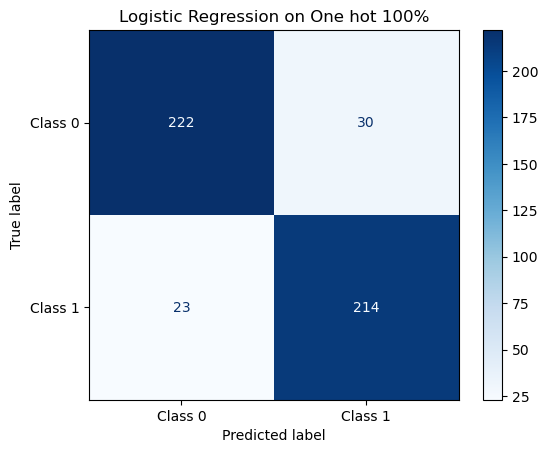

In [21]:
# 20 40 60 80 100
for i in range(20, 101, 20):
    train_df, test_df = getdfs("emoticon", i/100)
    y_train = train_df["label"]
    y_test = test_df["label"]
    oh_X_train, oh_X_val, y_train, y_val = one_hot_encode(train_df, test_df)
    oh_y_pred = predict_logistic_regression(oh_X_train, y_train, oh_X_val)
    evaluate_predictions(y_val, oh_y_pred, f"Logistic Regression on One hot {i}%")